In [1]:
import numpy as np
from biosppy import signals
from bqplot import Tooltip, LinearScale, Axis, Lines, Figure, PanZoom
import matplotlib.pyplot as plt
import bqplot.pyplot as bqplt
import bqplot
from glob import glob
import pandas as pd
from time import time
import ipywidgets

In [2]:
# Check for data files from all 15 subjects
path = 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\'
#Subjects S1 and S12 had sensor errors and are not included in download
pkl_dict = {'S'+str(i) : glob(path+'S'+str(i)+'\\S'+str(i)+'*.pkl', recursive=True)[0] for i in range(2,18,1) if i != 12} #Signal data

for dictionary, name in zip([pkl_dict], ['signal data']):
    print(name,':')
    for subjectID, pathstring in dictionary.items():
        print(subjectID,': ',pathstring)
    print('\n')

signal data :
S2 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S2\S2.pkl
S3 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S3\S3.pkl
S4 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S4\S4.pkl
S5 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S5\S5.pkl
S6 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S6\S6.pkl
S7 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S7\S7.pkl
S8 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S8\S8.pkl
S9 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S9\S9.pkl
S10 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S10\S10.pkl
S11 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S11\S11.pkl
S13 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S13\S13.pkl
S14 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S14\S14.pkl
S15 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S15\S15.pkl
S16 :  D:\Springboard\Capstone2\WESAD\Capstone2\data\raw\S16\S16.pkl
S17 :  D:\Springboard\Capstone2\WESAD\Capsto

In [3]:
def check_pkl_raw(Subj_ID, pkl_filepaths, return_data=False):
    """
    Check the integrity of raw time series data for a given subject.
    Input: 
        Subj_ID: string ('S2'-'S17')
        pkl_filepaths: dictionary of paths with Subj_ID as key
        return_data: Boolean. Indicates whether data should be returned at end of function
    Output (if requested by return_data keyword):
        dict_signal_single_subject: Dictionary containing data for the subject Subj_ID. 
    """    
    # LOAD DICTIONARY FROM PKL FILE
    dict_signal_single_subject = pd.read_pickle(pkl_filepaths[Subj_ID]) # Load pickle file
    print('Dictionary from .pkl file has keys:',dict_signal_single_subject.keys())
    # Check type, length of each key's value
    for key in dict_signal_single_subject.keys():
        print(key, ' is type:' , type(dict_signal_single_subject[key]), ' with length:', len(dict_signal_single_subject[key]))
        
    print('\n')
    print('SUBJECT #:',dict_signal_single_subject['subject'])
    
    # LABEL VALUES SHOW TEMPORAL STRUCTURE OF EXPERIMENT
    print('\n')
    print('LABEL unique values:',np.unique(dict_signal_single_subject['label'])) 
    # readme.pdf described label array as labels for the different experimental segments within the research design
    label_dict = {'0':'not defined/transient' ,'1':'baseline' ,'2':'stress' ,'3':'amusement' ,'4':'meditation' ,'5':'ignore' ,'6':'ignore' ,'7':'ignore' }
    print(label_dict)
    plt.plot(np.linspace(0, 6079, len(dict_signal_single_subject['label'])), dict_signal_single_subject['label'])
    plt.title(dict_signal_single_subject['subject']+' label array')
    plt.xlabel('time (s)')
    plt.ylabel('LABEL CODE')
    plt.show()
    
    # EXAMINE PHYSIOLOGY SIGNAL ARRAYS
    print('\n')
    print('SIGNAL KEYS:',dict_signal_single_subject['signal'].keys())
    print('chest:', type(dict_signal_single_subject['signal']['chest']), 'has keys:', dict_signal_single_subject['signal']['chest'].keys()) # Chest = RespiBAN data
    print('wrist:',type(dict_signal_single_subject['signal']['wrist']), 'has keys:', dict_signal_single_subject['signal']['wrist'].keys()) # Wrist = Empatica E4 data
    Wrist_Hz_dict = {'ACC':32, 'BVP':64, 'EDA':4, 'TEMP':4} # Frequency for Wrist device channels
    Chest_Hz_dict = {'ACC':700, 'ECG':700, 'EMG':700, 'EDA':700, 'Temp':700, 'Resp':700} # Frequency for Chest device channels
    # Plot histograms for each recording channel
    for device, device_name, Hz_dict in zip(['chest', 'wrist'], ['Chest (RespiBAN) sensor', 'Wrist (Empatica E4) sensor'], [Chest_Hz_dict, Wrist_Hz_dict]):
        print('\n',device_name)
        fig, axes = plt.subplots(1, len(dict_signal_single_subject['signal'][device].keys()), figsize=[16,2.5])
        for key, ax in zip(dict_signal_single_subject['signal'][device].keys(), axes):
            sig_array = dict_signal_single_subject['signal'][device][key]
            print(key, 'array has shape:', sig_array.shape, 'at',Hz_dict[key], 'Hz for a total of ', sig_array.shape[0]/Hz_dict[key],'seconds')
            sample = np.random.choice(sig_array.flatten(), size=10000)
            ax.hist(sample, bins=20)
            ax.set_title(key)
        fig.suptitle(device_name+'\nHistograms of 10000 randomly sampled datapoints')
        plt.tight_layout()
        plt.show()
    print('\n----------------------------------------------------------------------------\n')
    
    if return_data == True:
        return dict_signal_single_subject

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4255300
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S2


LABEL unique values: [0 1 2 3 4 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


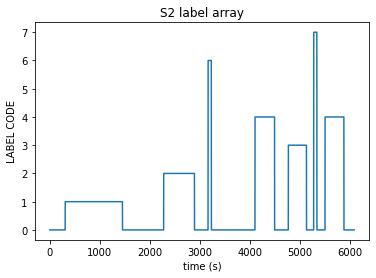



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4255300, 3) at 700 Hz for a total of  6079.0 seconds
ECG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EMG array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
EDA array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Temp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds
Resp array has shape: (4255300, 1) at 700 Hz for a total of  6079.0 seconds


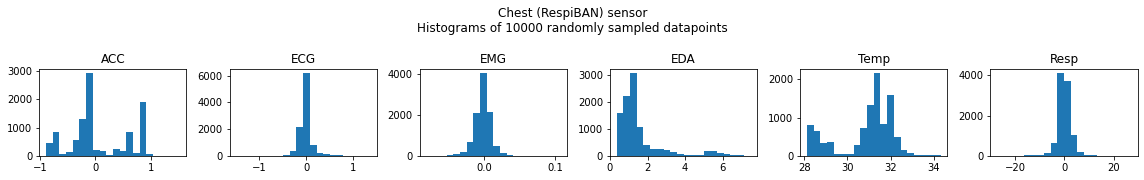


 Wrist (Empatica E4) sensor
ACC array has shape: (194528, 3) at 32 Hz for a total of  6079.0 seconds
BVP array has shape: (389056, 1) at 64 Hz for a total of  6079.0 seconds
EDA array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds
TEMP array has shape: (24316, 1) at 4 Hz for a total of  6079.0 seconds


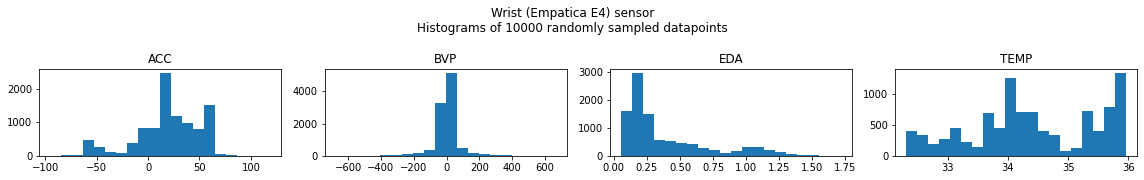


----------------------------------------------------------------------------

Elapsed time: 15.446141481399536


In [4]:
t0 = time()
S2_signal = check_pkl_raw('S2', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [8]:
t0 = time()
ECG_y = S2_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 24.760849237442017


In [10]:
ECG_y = S2_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

ECG_y.shape (4255300,)
ECG_x.shape (4255300,)
rpeaks.shape (7294,)
rpeaks_t.shape (7294,)
IBI_y.shape (7293,)
IBI_x.shape (7293,)


In [172]:
# Subset data to make plot size more manageable
s_frac = 0.0055 # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = 0.008  # End of plot.


s_idx = int(len(ECG_x)*s_frac)
e_idx = int(len(ECG_x)*e_frac)

IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

IBI truncated shape: (20,)
ECG truncated shape: (10638,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

In [38]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

In [39]:
IBI_suspicious_mask = determine_suspicious_IBIs(rpeaks)

Out of 7293 total IBIs, 424 are suspicious. 
5.81 percent are suspicious


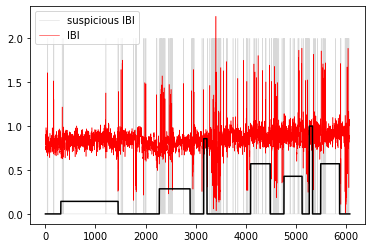

In [55]:
plt.plot(IBI_x, IBI_suspicious_mask*2, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(IBI_x, IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S2_signal['label']/7, color='k')
plt.legend(loc='upper left')

In [270]:
# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)
seg_num = 0

304 segments


In [271]:
# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

In [293]:
# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out, seg_number):
    # Save to IBI array
    
    # Then refresh marks
    alt_seg_number = int(np.round(ECG_lines.x[0]/20))
    with out:
        print('first mark',ECG_lines.x[0])
        print(np.round(ECG_lines.x[0]/20))

    with out:
        print(seg_number)
    seg_number += 1
    alt_seg_number+=1
    with out:
        print(seg_number)
    with out:
        print('ALT:',alt_seg_number)
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
    IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = IBI_x[IBI_mask]
        IBI_lines.y = IBI_y[IBI_mask]
    

Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
display(field)
with field:
    print('Segment Number: ', seg_num)
from functools import partial
Next_Seg = partial(Next_Segment, out=field, seg_number=seg_num)
Next_button.on_click(Next_Seg)

IBI truncated shape: (27,)
ECG truncated shape: (15397,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [392]:
ECG_y = S2_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

ECG_y.shape (4255300,)
ECG_x.shape (4255300,)
rpeaks.shape (7294,)
rpeaks_t.shape (7294,)
IBI_y.shape (7293,)
IBI_x.shape (7293,)


# Introduced functionality for adding beats, deleting beats, and navigating forward.
# Shows IBIs on top of ECG.
# Still need saving functionality.
# Might need selective navigation to suspicious areas and a previous segment navigation.

In [295]:
reserve_IBI_x = IBI_x
reserve_IBI_y = IBI_y

In [393]:
# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)
seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def save_to_total(IBI_x_, IBI_y_, plotted_x, plotted_y):
    
    IBI_x_ = np.sort(list(set(np.append(IBI_x_, plotted_x))))
    IBI_y_ = np.append(IBI_y_[0], IBI_x_[1:]-IBI_x_[:-1])
    return (IBI_x_, IBI_y_)

def Next_Segment(b, out):
    # Save to IBI array
    Next_Segment.IBI_x, Next_Segment.IBI_y = save_to_total(Next_Segment.IBI_x, Next_Segment.IBI_y, IBI_lines.x, IBI_lines.y)
    # Then refresh marks
    alt_seg_number = int(np.round(ECG_lines.x[0]/20))
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
    IBI_mask = np.logical_and(Next_Segment.IBI_x > ECG_x[s_idx], Next_Segment.IBI_x < ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = Next_Segment.IBI_x[IBI_mask]
        IBI_lines.y = Next_Segment.IBI_y[IBI_mask]
    return Next_Segment.IBI_x
    return Next_Segment.IBI_y
    
Next_Segment.IBI_x = IBI_x
Next_Segment.IBI_y = IBI_y
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
display(field)
with field:
    print('Segment Number:', seg_num)
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)

304 segments
IBI truncated shape: (27,)
ECG truncated shape: (15397,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [407]:
len(Next_Segment.IBI_x), len(Next_Segment.IBI_y)

(7303, 7303)

In [408]:
len(IBI_x), len(IBI_y)

(7293, 7293)

# Add functionality to save delections
## Will try to move IBI array saving to brush callback function

In [485]:
ECG_y = S2_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)
seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = int(np.round(ECG_lines.x[0]/20))
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x > ECG_x[s_idx], brush_update_IBI.IBI_x < ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x > ECG_x[s_idx], brush_update_IBI.IBI_x < ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

ECG_y.shape (4255300,)
ECG_x.shape (4255300,)
rpeaks.shape (7294,)
rpeaks_t.shape (7294,)
IBI_y.shape (7293,)
IBI_x.shape (7293,)
304 segments
IBI truncated shape: (27,)
ECG truncated shape: (15397,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [552]:
len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y)
len(IBI_x), len(IBI_y)

(7293, 7293)

In [553]:
#import copy
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S2_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S2_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [554]:
print(len(S2_IBI_x), len(S2_IBI_y))

7291 7291


In [543]:
S2_IBI_df = pd.DataFrame(dict(S2_time=S2_IBI_x, S2_IBI=S2_IBI_y))

In [544]:
S2_IBI_df.to_csv('S2_IBI_df.csv')

In [547]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

In [555]:
IBI_suspicious_mask_post_processed = determine_suspicious_IBIs(S2_IBI_x*700)

Out of 7290 total IBIs, 50 are suspicious. 
0.69 percent are suspicious


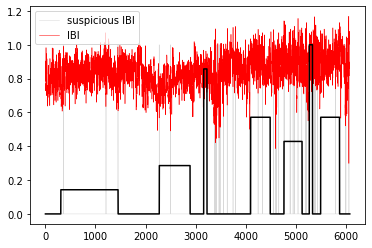

In [556]:
plt.plot(S2_IBI_x[1:], IBI_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S2_IBI_x, S2_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S2_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S2. Moving to S3

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4545100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S3


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


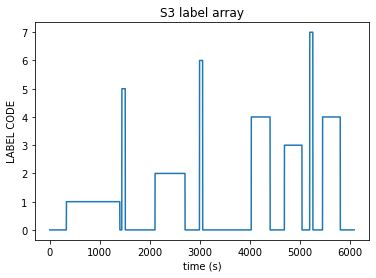



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4545100, 3) at 700 Hz for a total of  6493.0 seconds
ECG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EMG array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
EDA array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Temp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds
Resp array has shape: (4545100, 1) at 700 Hz for a total of  6493.0 seconds


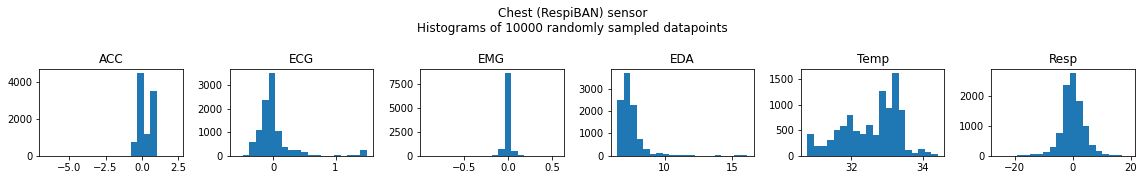


 Wrist (Empatica E4) sensor
ACC array has shape: (207776, 3) at 32 Hz for a total of  6493.0 seconds
BVP array has shape: (415552, 1) at 64 Hz for a total of  6493.0 seconds
EDA array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds
TEMP array has shape: (25972, 1) at 4 Hz for a total of  6493.0 seconds


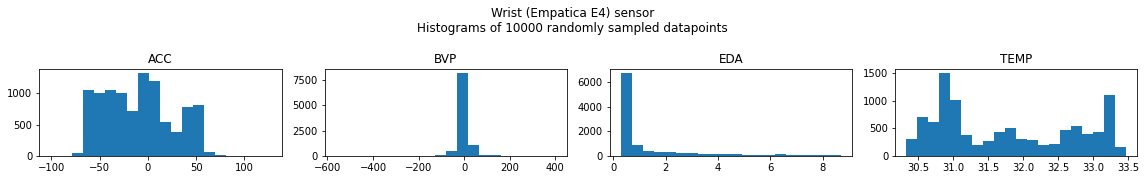


----------------------------------------------------------------------------

Elapsed time: 17.192399978637695


In [557]:
t0 = time()
S3_signal = check_pkl_raw('S3', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [558]:
t0 = time()
ECG_y = S3_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 12.998978853225708


In [559]:
ECG_y = S3_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (4545100,)
ECG_x.shape (4545100,)
rpeaks.shape (6548,)
rpeaks_t.shape (6548,)
IBI_y.shape (6547,)
IBI_x.shape (6547,)
325 segments


In [560]:

seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = int(np.round(ECG_lines.x[0]/20))
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x > ECG_x[s_idx], brush_update_IBI.IBI_x < ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x > ECG_x[s_idx], brush_update_IBI.IBI_x < ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (26,)
ECG truncated shape: (15383,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [562]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

6547 6547
6547 6547


In [563]:
print(IBI_x[:5])
print(brush_update_IBI.IBI_x[:5])


[0.08857145 1.03285737 1.90285756 2.7757149  3.67000081]
[0.33714293 1.03285737 1.90285756 2.7757149  3.67000081]


In [564]:
print(IBI_y[:5])
print(brush_update_IBI.IBI_y[:5])


[0.24714291 0.94428592 0.87000019 0.87285733 0.89428591]
[0.24714291 0.69571444 0.87000019 0.87285733 0.89428591]


In [567]:
#import copy
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S3_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S3_IBI_y = np.copy(brush_update_IBI.IBI_y)
S3_IBI_df = pd.DataFrame(dict(S3_time=S3_IBI_x, S3_IBI=S3_IBI_y))

NameError: name 'S3_IBI_x' is not defined

In [569]:
S3_IBI_df = pd.DataFrame(dict(S3_time=IBI_x, S3_IBI=IBI_y))
S3_IBI_df.head()

,S3_time,S3_IBI
0,0.337143,0.247143
1,1.032857,0.695714
2,1.902858,0.870000
3,2.775715,0.872857
4,3.670001,0.894286


In [570]:
S3_IBI_df.to_csv('S3_IBI_df.csv')

In [572]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI3_suspicious_mask_post_processed = determine_suspicious_IBIs(IBI_x*700)

Out of 6546 total IBIs, 135 are suspicious. 
2.06 percent are suspicious


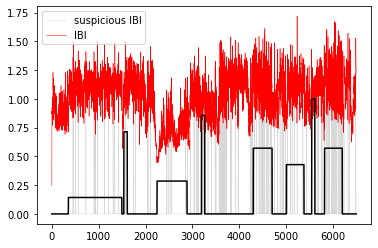

In [573]:
plt.plot(IBI_x[1:], IBI3_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(IBI_x, IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S3_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S3. Moving to S4

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4496100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S4


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


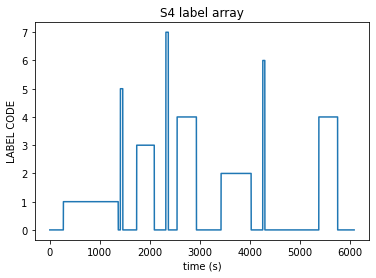



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4496100, 3) at 700 Hz for a total of  6423.0 seconds
ECG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EMG array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
EDA array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Temp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds
Resp array has shape: (4496100, 1) at 700 Hz for a total of  6423.0 seconds


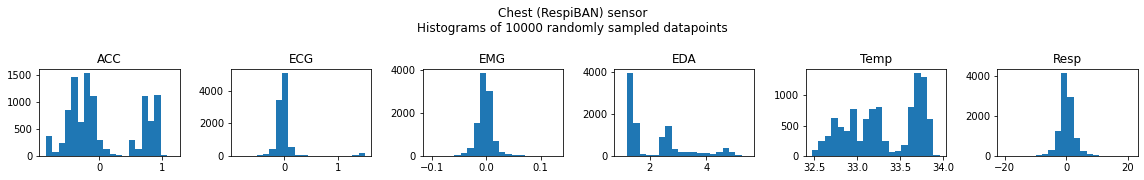


 Wrist (Empatica E4) sensor
ACC array has shape: (205536, 3) at 32 Hz for a total of  6423.0 seconds
BVP array has shape: (411072, 1) at 64 Hz for a total of  6423.0 seconds
EDA array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds
TEMP array has shape: (25692, 1) at 4 Hz for a total of  6423.0 seconds


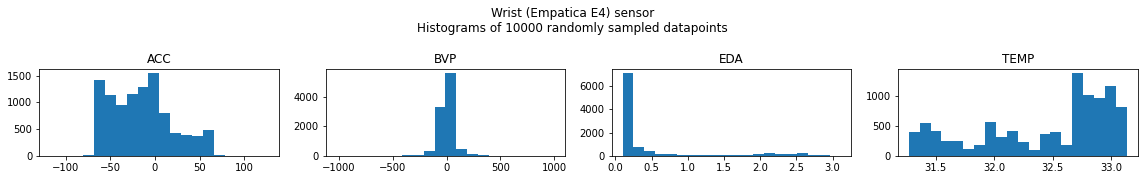


----------------------------------------------------------------------------

Elapsed time: 16.304009199142456


In [577]:
t0 = time()
S_signal = check_pkl_raw('S4', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [578]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 13.382302522659302


In [579]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (4496100,)
ECG_x.shape (4496100,)
rpeaks.shape (6953,)
rpeaks_t.shape (6953,)
IBI_y.shape (6952,)
IBI_x.shape (6952,)
322 segments


In [582]:
e_frac_list[185:195]

array([0.57795031, 0.5810559 , 0.58416149, 0.58726708, 0.59037267,
       0.59347826, 0.59658385, 0.59968944, 0.60279503, 0.60590062])

In [587]:

seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (26,)
ECG truncated shape: (15359,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [593]:
brush_update_IBI.seg_num

320

In [594]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

6952 6952
6952 6952


In [596]:
print(IBI_x[5:10])
print(brush_update_IBI.IBI_x[5:10])


[5.63571554 6.13857279 7.18571588 8.01143035 8.90857341]
[5.63571554 6.23142996 7.18571588 8.01143035 8.90857341]


In [585]:
print(IBI_y[:5])
print(brush_update_IBI.IBI_y[:5])


[0.99285736 0.96285736 0.85571448 0.83285733 0.81142875]
[0.99285736 0.96285736 0.85571448 0.83285733 0.81142875]


In [597]:
#import copy
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S4_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S4_IBI_y = np.copy(brush_update_IBI.IBI_y)
S4_IBI_df = pd.DataFrame(dict(S4_time=S4_IBI_x, S4_IBI=S4_IBI_y))

In [598]:
S4_IBI_df = pd.DataFrame(dict(S4_time=S4_IBI_x, S4_IBI=S4_IBI_y))
S4_IBI_df.head()

,S4_time,S4_IBI
0,1.378572,0.992857
1,2.341429,0.962857
2,3.197144,0.855714
3,4.030001,0.832857
4,4.841430,0.811429


In [599]:
S4_IBI_df.to_csv('S4_IBI_df.csv')

In [600]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI4_suspicious_mask_post_processed = determine_suspicious_IBIs(S4_IBI_x*700)

Out of 6951 total IBIs, 13 are suspicious. 
0.19 percent are suspicious


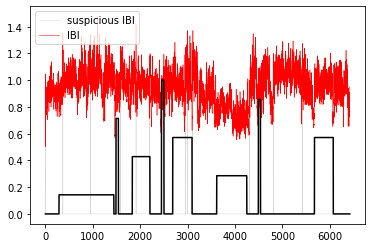

In [601]:
plt.plot(S4_IBI_x[1:], IBI4_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S4_IBI_x, IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S4. Moving to S5

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4380600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S5


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


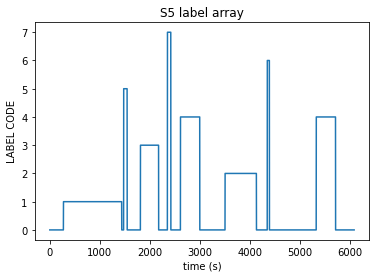



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4380600, 3) at 700 Hz for a total of  6258.0 seconds
ECG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EMG array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
EDA array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Temp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds
Resp array has shape: (4380600, 1) at 700 Hz for a total of  6258.0 seconds


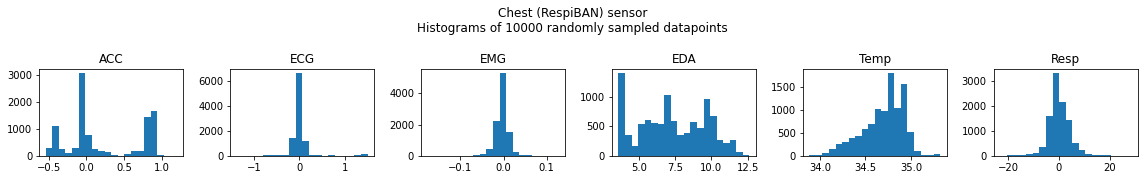


 Wrist (Empatica E4) sensor
ACC array has shape: (200256, 3) at 32 Hz for a total of  6258.0 seconds
BVP array has shape: (400512, 1) at 64 Hz for a total of  6258.0 seconds
EDA array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds
TEMP array has shape: (25032, 1) at 4 Hz for a total of  6258.0 seconds


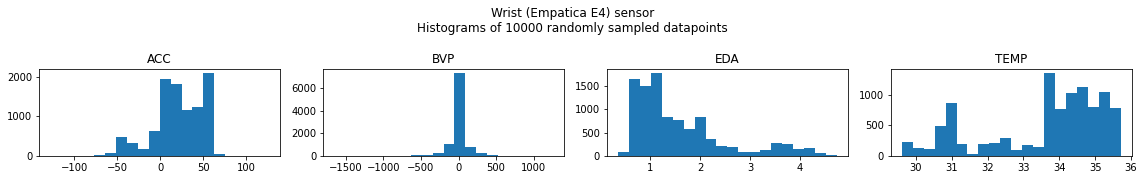


----------------------------------------------------------------------------

Elapsed time: 17.582351446151733


In [602]:
t0 = time()
S_signal = check_pkl_raw('S5', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [603]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 9.667900323867798


In [604]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (4380600,)
ECG_x.shape (4380600,)
rpeaks.shape (7287,)
rpeaks_t.shape (7287,)
IBI_y.shape (7286,)
IBI_x.shape (7286,)
313 segments


In [605]:
e_frac_list[185:195]

array([0.59456869, 0.59776358, 0.60095847, 0.60415335, 0.60734824,
       0.61054313, 0.61373802, 0.61693291, 0.6201278 , 0.62332268])

In [606]:

seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (26,)
ECG truncated shape: (15395,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [610]:
brush_update_IBI.seg_num

311

In [611]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

7287 7287
7286 7286


In [613]:
#import copy
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S5_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S5_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [615]:
S5_IBI_df = pd.DataFrame(dict(S5_time=S5_IBI_x, S5_IBI=S5_IBI_y))
S5_IBI_df.head()

,S5_time,S5_IBI
0,1.800000,0.907143
1,2.684286,0.884286
2,3.538572,0.854286
3,4.358572,0.820000
4,5.158573,0.800000


In [616]:
S5_IBI_df.to_csv('S5_IBI_df.csv')

In [617]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI5_suspicious_mask_post_processed = determine_suspicious_IBIs(S5_IBI_x*700)

Out of 7286 total IBIs, 1 are suspicious. 
0.01 percent are suspicious


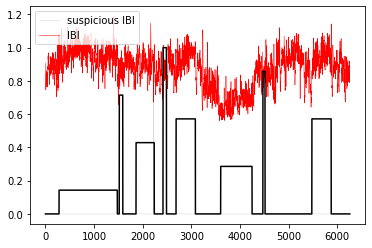

In [619]:
plt.plot(S5_IBI_x[1:], IBI5_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S5_IBI_x, S5_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S5, moving to S6

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4949700
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S6


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


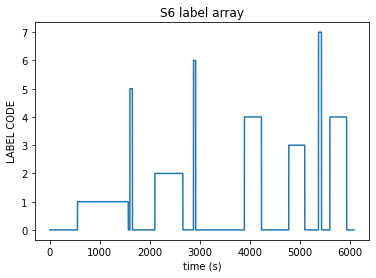



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4949700, 3) at 700 Hz for a total of  7071.0 seconds
ECG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EMG array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
EDA array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Temp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds
Resp array has shape: (4949700, 1) at 700 Hz for a total of  7071.0 seconds


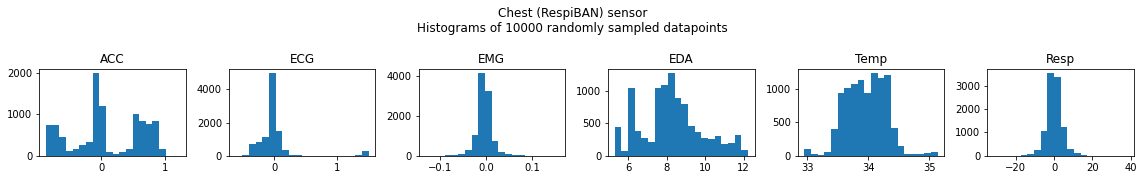


 Wrist (Empatica E4) sensor
ACC array has shape: (226272, 3) at 32 Hz for a total of  7071.0 seconds
BVP array has shape: (452544, 1) at 64 Hz for a total of  7071.0 seconds
EDA array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds
TEMP array has shape: (28284, 1) at 4 Hz for a total of  7071.0 seconds


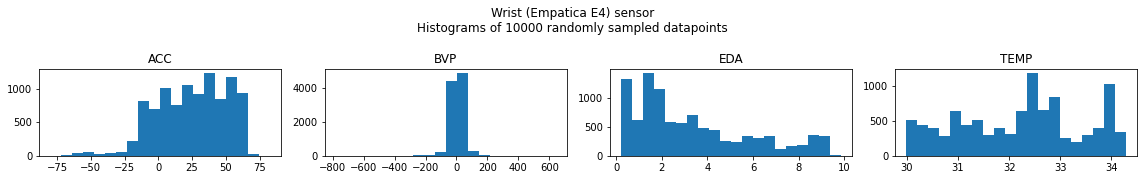


----------------------------------------------------------------------------

Elapsed time: 18.802875518798828


In [620]:
t0 = time()
S_signal = check_pkl_raw('S6', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [621]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 14.429265260696411


In [622]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (4949700,)
ECG_x.shape (4949700,)
rpeaks.shape (8367,)
rpeaks_t.shape (8367,)
IBI_y.shape (8366,)
IBI_x.shape (8366,)
354 segments


In [623]:
e_frac_list[185:195]

array([0.52570621, 0.52853107, 0.53135593, 0.53418079, 0.53700565,
       0.53983051, 0.54265537, 0.54548023, 0.54830508, 0.55112994])

In [624]:

seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (27,)
ECG truncated shape: (15380,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [625]:
brush_update_IBI.seg_num

352

In [626]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

8367 8367
8366 8366


In [627]:
#import copy
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S6_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S6_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [628]:
S6_IBI_df = pd.DataFrame(dict(S6_time=S6_IBI_x, S6_IBI=S6_IBI_y))
S6_IBI_df.head()

,S6_time,S6_IBI
0,1.411429,0.827143
1,2.222858,0.811429
2,3.018572,0.795714
3,3.801429,0.782857
4,4.604287,0.802857


In [629]:
S6_IBI_df.to_csv('S6_IBI_df.csv')

In [630]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI6_suspicious_mask_post_processed = determine_suspicious_IBIs(S6_IBI_x*700)

Out of 8366 total IBIs, 2 are suspicious. 
0.02 percent are suspicious


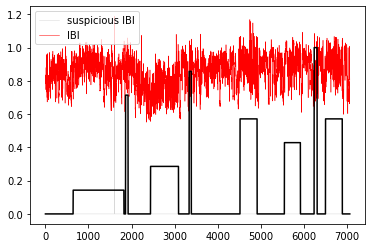

In [631]:
plt.plot(S6_IBI_x[1:], IBI6_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S6_IBI_x, S6_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S6, moving to S7

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3666600
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S7


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


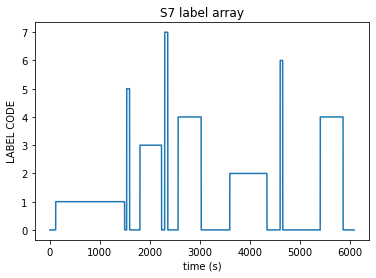



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3666600, 3) at 700 Hz for a total of  5238.0 seconds
ECG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EMG array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
EDA array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Temp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds
Resp array has shape: (3666600, 1) at 700 Hz for a total of  5238.0 seconds


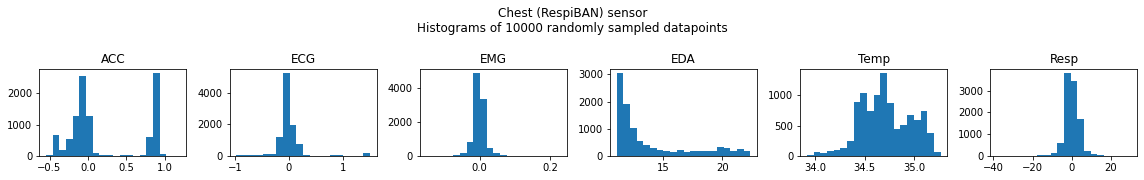


 Wrist (Empatica E4) sensor
ACC array has shape: (167616, 3) at 32 Hz for a total of  5238.0 seconds
BVP array has shape: (335232, 1) at 64 Hz for a total of  5238.0 seconds
EDA array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds
TEMP array has shape: (20952, 1) at 4 Hz for a total of  5238.0 seconds


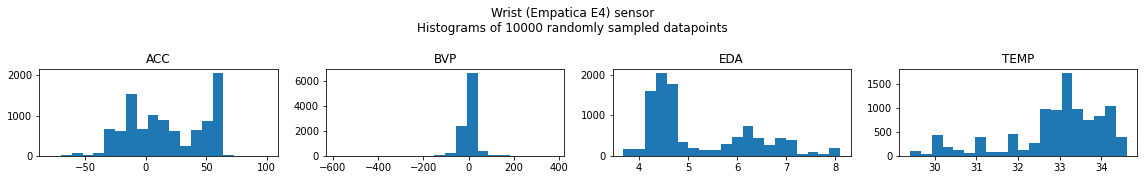


----------------------------------------------------------------------------

Elapsed time: 13.464367628097534


In [632]:
t0 = time()
S_signal = check_pkl_raw('S7', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [633]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 7.782695055007935


In [634]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3666600,)
ECG_x.shape (3666600,)
rpeaks.shape (6237,)
rpeaks_t.shape (6237,)
IBI_y.shape (6236,)
IBI_x.shape (6236,)
262 segments


In [635]:
e_frac_list[185:195]

array([0.71030534, 0.71412214, 0.71793893, 0.72175573, 0.72557252,
       0.72938931, 0.73320611, 0.7370229 , 0.74083969, 0.74465649])

In [636]:

seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (28,)
ECG truncated shape: (15394,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [637]:
brush_update_IBI.seg_num

260

In [638]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

6236 6236
6236 6236


In [639]:
#import copy
if True: #
#if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S7_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S7_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [640]:
S7_IBI_df = pd.DataFrame(dict(S7_time=S7_IBI_x, S7_IBI=S7_IBI_y))
S7_IBI_df.head()

,S7_time,S7_IBI
0,1.378572,0.762857
1,2.167143,0.788572
2,3.047144,0.880000
3,3.930001,0.882857
4,4.730001,0.800000


In [641]:
S7_IBI_df.to_csv('S7_IBI_df.csv')

In [642]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI7_suspicious_mask_post_processed = determine_suspicious_IBIs(S7_IBI_x*700)

Out of 6235 total IBIs, 99 are suspicious. 
1.59 percent are suspicious


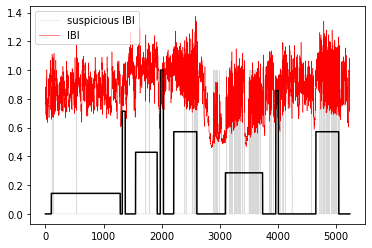

In [643]:
plt.plot(S7_IBI_x[1:], IBI7_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S7_IBI_x, S7_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S7, moving to S8

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3826200
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S8


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


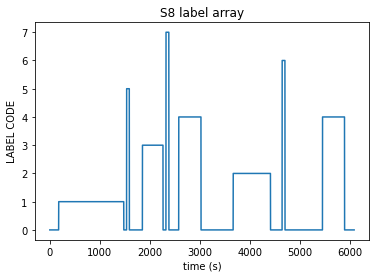



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3826200, 3) at 700 Hz for a total of  5466.0 seconds
ECG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EMG array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
EDA array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Temp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds
Resp array has shape: (3826200, 1) at 700 Hz for a total of  5466.0 seconds


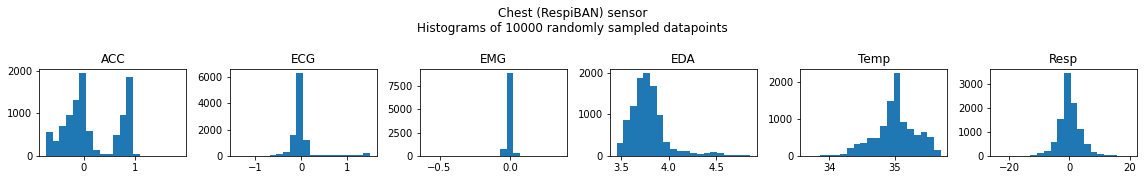


 Wrist (Empatica E4) sensor
ACC array has shape: (174912, 3) at 32 Hz for a total of  5466.0 seconds
BVP array has shape: (349824, 1) at 64 Hz for a total of  5466.0 seconds
EDA array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds
TEMP array has shape: (21864, 1) at 4 Hz for a total of  5466.0 seconds


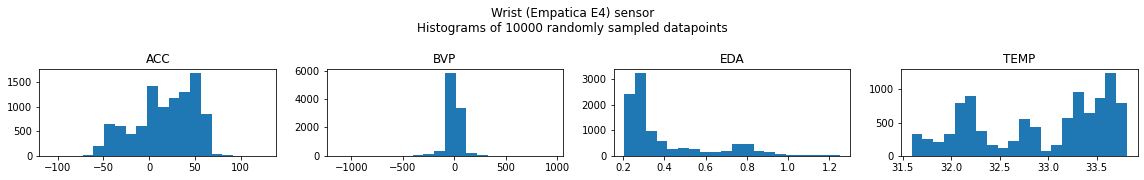


----------------------------------------------------------------------------

Elapsed time: 15.088550090789795


In [644]:
t0 = time()
S_signal = check_pkl_raw('S8', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [645]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 9.48722243309021


In [646]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3826200,)
ECG_x.shape (3826200,)
rpeaks.shape (6890,)
rpeaks_t.shape (6890,)
IBI_y.shape (6889,)
IBI_x.shape (6889,)
274 segments


In [647]:
e_frac_list[185:195]

array([0.67919708, 0.68284672, 0.68649635, 0.69014599, 0.69379562,
       0.69744526, 0.70109489, 0.70474453, 0.70839416, 0.7120438 ])

In [648]:

seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (30,)
ECG truncated shape: (15360,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [649]:
brush_update_IBI.seg_num

272

In [650]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

6884 6884
6889 6889


In [651]:
#import copy
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S8_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S8_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [652]:
S8_IBI_df = pd.DataFrame(dict(S8_time=S8_IBI_x, S8_IBI=S8_IBI_y))
S8_IBI_df.head()

,S8_time,S8_IBI
0,0.840000,0.775714
1,1.575715,0.735714
2,2.327143,0.751429
3,3.085715,0.758572
4,3.815715,0.730000


In [653]:
S8_IBI_df.to_csv('S8_IBI_df.csv')

In [654]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI8_suspicious_mask_post_processed = determine_suspicious_IBIs(S8_IBI_x*700)

Out of 6883 total IBIs, 8 are suspicious. 
0.12 percent are suspicious


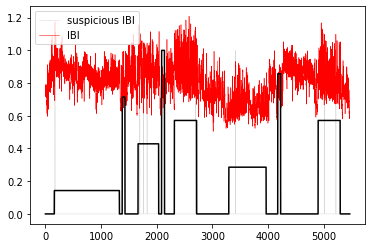

In [655]:
plt.plot(S8_IBI_x[1:], IBI8_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S8_IBI_x, S8_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S8, moving to S9

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3656100
subject  is type: <class 'str'>  with length: 2


SUBJECT #: S9


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


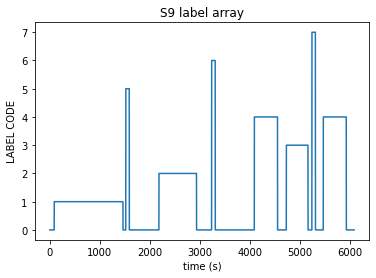



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3656100, 3) at 700 Hz for a total of  5223.0 seconds
ECG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EMG array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
EDA array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Temp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds
Resp array has shape: (3656100, 1) at 700 Hz for a total of  5223.0 seconds


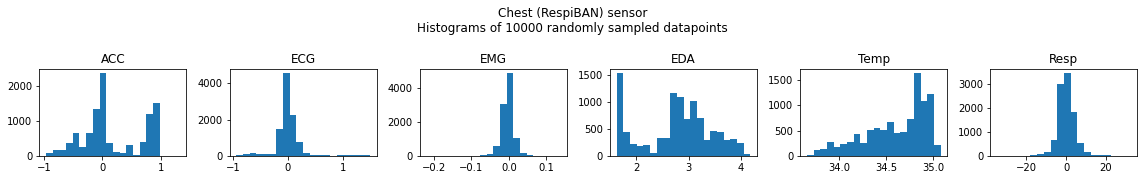


 Wrist (Empatica E4) sensor
ACC array has shape: (167136, 3) at 32 Hz for a total of  5223.0 seconds
BVP array has shape: (334272, 1) at 64 Hz for a total of  5223.0 seconds
EDA array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds
TEMP array has shape: (20892, 1) at 4 Hz for a total of  5223.0 seconds


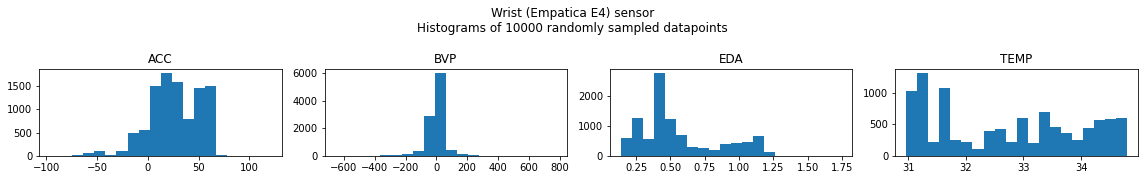


----------------------------------------------------------------------------

Elapsed time: 14.29246973991394


In [656]:
t0 = time()
S_signal = check_pkl_raw('S9', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [657]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 8.83690357208252


In [658]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3656100,)
ECG_x.shape (3656100,)
rpeaks.shape (6866,)
rpeaks_t.shape (6866,)
IBI_y.shape (6865,)
IBI_x.shape (6865,)
262 segments


In [659]:
e_frac_list[185:195]

array([0.71030534, 0.71412214, 0.71793893, 0.72175573, 0.72557252,
       0.72938931, 0.73320611, 0.7370229 , 0.74083969, 0.74465649])

In [660]:

seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (35,)
ECG truncated shape: (15350,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [661]:
brush_update_IBI.seg_num

260

In [662]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

6867 6867
6865 6865


In [663]:
#import copy
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S9_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S9_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [664]:
S9_IBI_df = pd.DataFrame(dict(S9_time=S9_IBI_x, S9_IBI=S9_IBI_y))
S9_IBI_df.head()

,S9_time,S9_IBI
0,0.382857,0.342857
1,1.025715,0.642857
2,1.671429,0.645714
3,2.324286,0.652857
4,2.982858,0.658572


In [665]:
S9_IBI_df.to_csv('S9_IBI_df.csv')

In [666]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI9_suspicious_mask_post_processed = determine_suspicious_IBIs(S9_IBI_x*700)

Out of 6866 total IBIs, 2 are suspicious. 
0.03 percent are suspicious


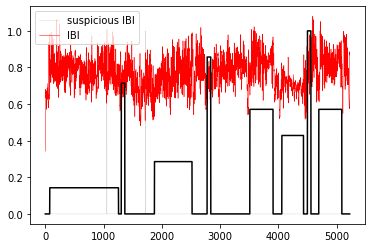

In [667]:
plt.plot(S9_IBI_x[1:], IBI9_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S9_IBI_x, S9_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S9, moving to S10

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3847200
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S10


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


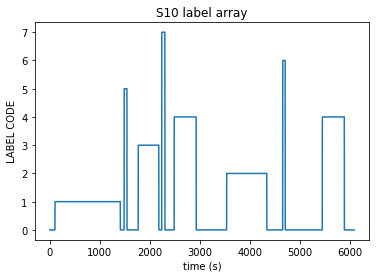



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3847200, 3) at 700 Hz for a total of  5496.0 seconds
ECG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EMG array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
EDA array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Temp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds
Resp array has shape: (3847200, 1) at 700 Hz for a total of  5496.0 seconds


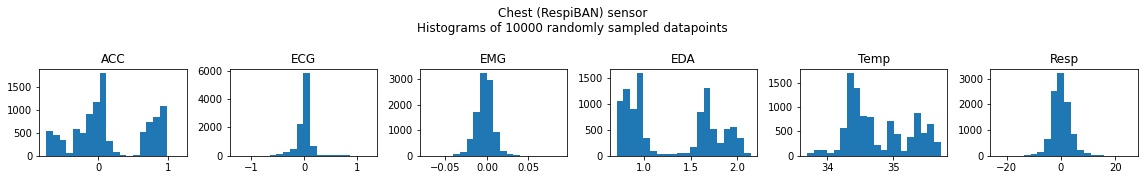


 Wrist (Empatica E4) sensor
ACC array has shape: (175872, 3) at 32 Hz for a total of  5496.0 seconds
BVP array has shape: (351744, 1) at 64 Hz for a total of  5496.0 seconds
EDA array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds
TEMP array has shape: (21984, 1) at 4 Hz for a total of  5496.0 seconds


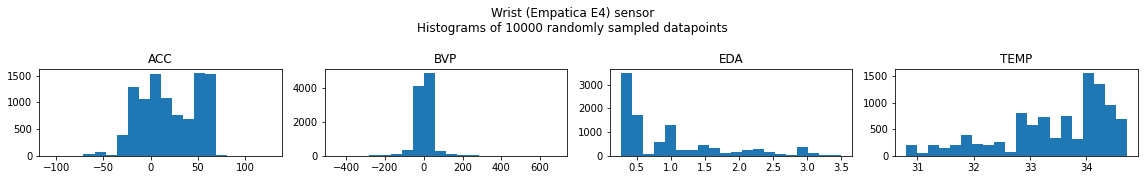


----------------------------------------------------------------------------

Elapsed time: 13.583458423614502


In [669]:
t0 = time()
S_signal = check_pkl_raw('S10', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [670]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 10.85177993774414


In [671]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3847200,)
ECG_x.shape (3847200,)
rpeaks.shape (8421,)
rpeaks_t.shape (8421,)
IBI_y.shape (8420,)
IBI_x.shape (8420,)
275 segments


In [672]:
e_frac_list[185:195]

array([0.67672727, 0.68036364, 0.684     , 0.68763636, 0.69127273,
       0.69490909, 0.69854545, 0.70218182, 0.70581818, 0.70945455])

In [673]:

seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (33,)
ECG truncated shape: (15388,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [678]:
brush_update_IBI.seg_num

273

In [679]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

8425 8425
8420 8420


In [680]:
print(rpeaks[:5]/700)
print(brush_update_IBI.IBI_x[:5])

[0.92714286 1.56142857 2.19428571 2.82       3.44571429]
[0.24857149 0.9271431  1.56142898 2.19428628 2.82000073]


In [681]:
#import copy
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [682]:
S10_IBI_df = pd.DataFrame(dict(S10_time=S_IBI_x, S10_IBI=S_IBI_y))
S10_IBI_df.head()

,S10_time,S10_IBI
0,0.248571,0.634286
1,0.927143,0.678572
2,1.561429,0.634286
3,2.194286,0.632857
4,2.820001,0.625714


In [683]:
S10_IBI_df.to_csv('S10_IBI_df.csv')

In [685]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI10_suspicious_mask_post_processed = determine_suspicious_IBIs(S_IBI_x*700)

Out of 8424 total IBIs, 22 are suspicious. 
0.26 percent are suspicious


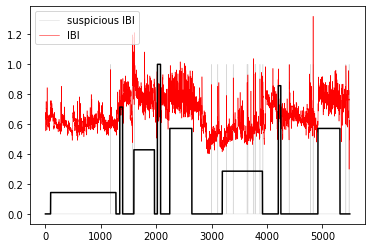

In [686]:
plt.plot(S_IBI_x[1:], IBI10_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S_IBI_x, S_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S10, moving to S11

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3663100
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S11


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


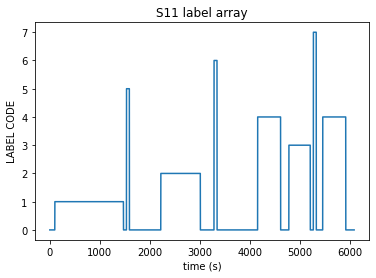



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3663100, 3) at 700 Hz for a total of  5233.0 seconds
ECG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EMG array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
EDA array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Temp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds
Resp array has shape: (3663100, 1) at 700 Hz for a total of  5233.0 seconds


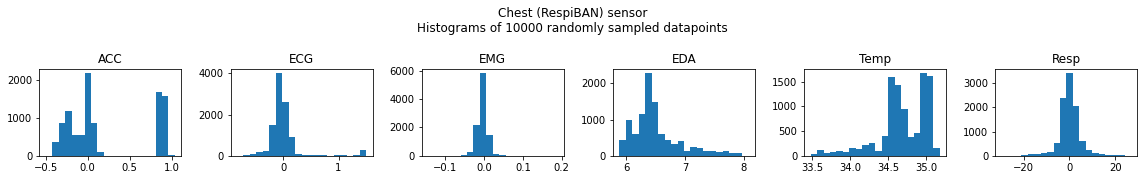


 Wrist (Empatica E4) sensor
ACC array has shape: (167456, 3) at 32 Hz for a total of  5233.0 seconds
BVP array has shape: (334912, 1) at 64 Hz for a total of  5233.0 seconds
EDA array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds
TEMP array has shape: (20932, 1) at 4 Hz for a total of  5233.0 seconds


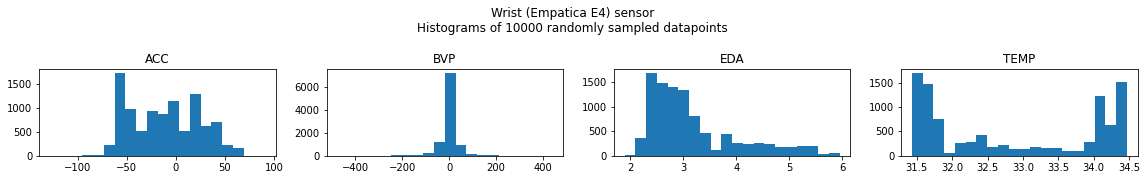


----------------------------------------------------------------------------

Elapsed time: 7.247361660003662


In [714]:
t0 = time()
S_signal = check_pkl_raw('S11', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [715]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 7.748305797576904


In [716]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3663100,)
ECG_x.shape (3663100,)
rpeaks.shape (7862,)
rpeaks_t.shape (7862,)
IBI_y.shape (7861,)
IBI_x.shape (7861,)
262 segments


In [717]:
e_frac_list[185:195]

array([0.71030534, 0.71412214, 0.71793893, 0.72175573, 0.72557252,
       0.72938931, 0.73320611, 0.7370229 , 0.74083969, 0.74465649])

In [718]:
# GUI to manually fix any mistakes made by the hamilton_segmenter 
seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (34,)
ECG truncated shape: (15379,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [719]:
brush_update_IBI.seg_num

0

In [720]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

7861 7861
7861 7861


In [721]:
print(rpeaks[:5]/700)
print(brush_update_IBI.IBI_x[:5])

[0.40571429 1.02857143 1.66142857 2.29857143 2.96142857]
[1.02857171 1.66142902 2.29857206 2.96142938 3.63285813]


In [722]:
#import copy
if True: #
#if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [726]:
S11_IBI_df = pd.DataFrame(dict(S11_time=S_IBI_x, S11_IBI=S_IBI_y))
S11_IBI_df.head()

,S11_time,S11_IBI
0,1.028572,0.622857
1,1.661429,0.632857
2,2.298572,0.637143
3,2.961429,0.662857
4,3.632858,0.671429


In [727]:
S11_IBI_df.to_csv('S11_IBI_df.csv')

In [724]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI11_suspicious_mask_post_processed = determine_suspicious_IBIs(S_IBI_x*700)

Out of 7860 total IBIs, 2 are suspicious. 
0.03 percent are suspicious


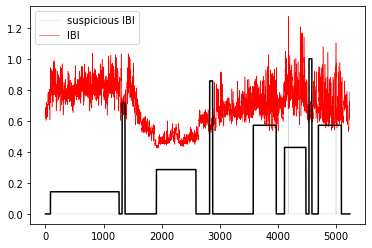

In [725]:
plt.plot(S_IBI_x[1:], IBI11_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S_IBI_x, S_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S11, moving to S13

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3875900
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S13


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


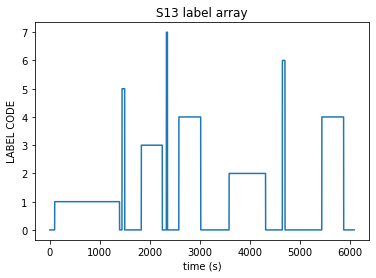



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3875900, 3) at 700 Hz for a total of  5537.0 seconds
ECG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EMG array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
EDA array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Temp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds
Resp array has shape: (3875900, 1) at 700 Hz for a total of  5537.0 seconds


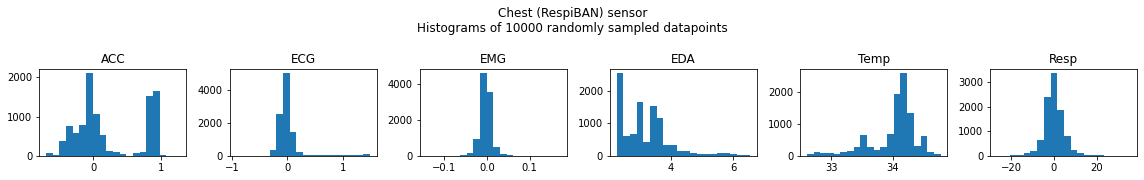


 Wrist (Empatica E4) sensor
ACC array has shape: (177184, 3) at 32 Hz for a total of  5537.0 seconds
BVP array has shape: (354368, 1) at 64 Hz for a total of  5537.0 seconds
EDA array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds
TEMP array has shape: (22148, 1) at 4 Hz for a total of  5537.0 seconds


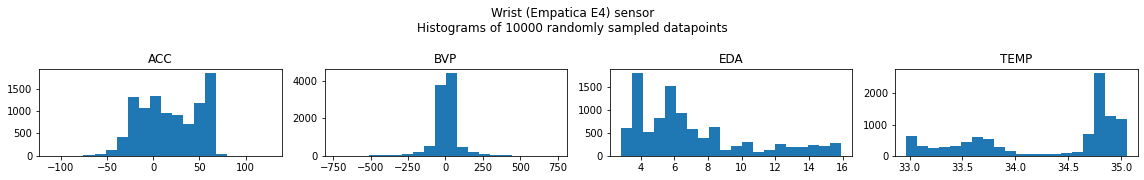


----------------------------------------------------------------------------

Elapsed time: 13.587153196334839


In [700]:
t0 = time()
S_signal = check_pkl_raw('S13', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [701]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 10.781155109405518


In [702]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3875900,)
ECG_x.shape (3875900,)
rpeaks.shape (8024,)
rpeaks_t.shape (8024,)
IBI_y.shape (8023,)
IBI_x.shape (8023,)
277 segments


In [703]:
e_frac_list[185:195]

array([0.67184116, 0.67545126, 0.67906137, 0.68267148, 0.68628159,
       0.6898917 , 0.69350181, 0.69711191, 0.70072202, 0.70433213])

In [704]:
# GUI to manually fix any mistakes made by the hamilton_segmenter 
seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (32,)
ECG truncated shape: (15391,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [705]:
brush_update_IBI.seg_num

275

In [706]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

8023 8023
8023 8023


In [707]:
print(rpeaks[:5]/700)
print(brush_update_IBI.IBI_x[:5])

[0.70714286 1.44       2.16142857 2.88714286 3.61428571]
[1.44000037 2.16142913 2.8871436  3.61428665 4.31000111]


In [708]:
#import copy
if True: #
#if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [709]:
S13_IBI_df = pd.DataFrame(dict(S13_time=S_IBI_x, S13_IBI=S_IBI_y))
S13_IBI_df.head()

,S13_time,S13_IBI
0,1.440000,0.732857
1,2.161429,0.721429
2,2.887144,0.725714
3,3.614287,0.727143
4,4.310001,0.695714


In [713]:
S13_IBI_df.to_csv('S13_IBI_df.csv')

In [711]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI13_suspicious_mask_post_processed = determine_suspicious_IBIs(S_IBI_x*700)

Out of 8022 total IBIs, 26 are suspicious. 
0.32 percent are suspicious


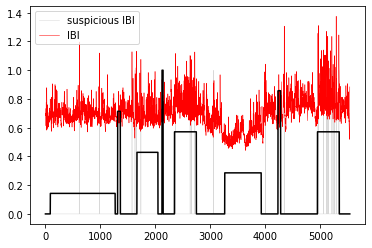

In [712]:
plt.plot(S_IBI_x[1:], IBI13_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S_IBI_x, S_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S13, moving to S14

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3883600
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S14


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


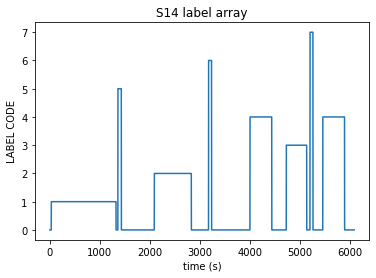



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3883600, 3) at 700 Hz for a total of  5548.0 seconds
ECG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EMG array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
EDA array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Temp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds
Resp array has shape: (3883600, 1) at 700 Hz for a total of  5548.0 seconds


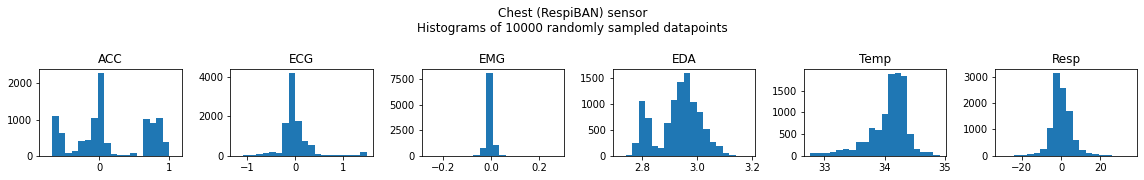


 Wrist (Empatica E4) sensor
ACC array has shape: (177536, 3) at 32 Hz for a total of  5548.0 seconds
BVP array has shape: (355072, 1) at 64 Hz for a total of  5548.0 seconds
EDA array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds
TEMP array has shape: (22192, 1) at 4 Hz for a total of  5548.0 seconds


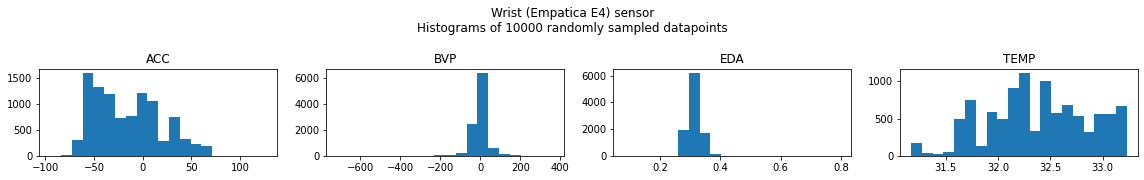


----------------------------------------------------------------------------

Elapsed time: 15.317132234573364


In [728]:
t0 = time()
S_signal = check_pkl_raw('S14', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [729]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 10.72917127609253


In [730]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3883600,)
ECG_x.shape (3883600,)
rpeaks.shape (8176,)
rpeaks_t.shape (8176,)
IBI_y.shape (8175,)
IBI_x.shape (8175,)
278 segments


In [731]:
e_frac_list[185:195]

array([0.66942446, 0.67302158, 0.67661871, 0.68021583, 0.68381295,
       0.68741007, 0.69100719, 0.69460432, 0.69820144, 0.70179856])

In [732]:
# GUI to manually fix any mistakes made by the hamilton_segmenter 
seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (30,)
ECG truncated shape: (15366,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [733]:
brush_update_IBI.seg_num

276

In [734]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

8177 8177
8175 8175


In [735]:
print(rpeaks[:5]/700)
print(brush_update_IBI.IBI_x[:5])

[0.20571429 0.92714286 1.62857143 2.3        2.98142857]
[0.9271431  1.62857185 2.30000059 2.98142934 3.67571523]


In [737]:
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [738]:
S14_IBI_df = pd.DataFrame(dict(S14_time=S_IBI_x, S14_IBI=S_IBI_y))
S14_IBI_df.head()

,S14_time,S14_IBI
0,0.927143,0.721429
1,1.628572,0.701429
2,2.300001,0.671429
3,2.981429,0.681429
4,3.675715,0.694286


In [739]:
S14_IBI_df.to_csv('S14_IBI_df.csv')

In [740]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI14_suspicious_mask_post_processed = determine_suspicious_IBIs(S_IBI_x*700)

Out of 8176 total IBIs, 1 are suspicious. 
0.01 percent are suspicious


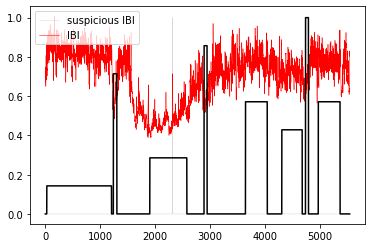

In [741]:
plt.plot(S_IBI_x[1:], IBI14_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S_IBI_x, S_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S14, moving to S15

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3676400
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S15


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


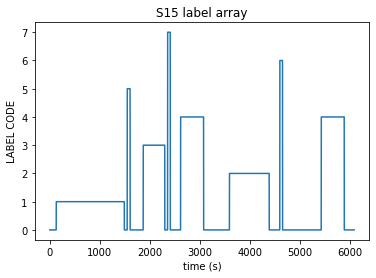



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3676400, 3) at 700 Hz for a total of  5252.0 seconds
ECG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EMG array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
EDA array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Temp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds
Resp array has shape: (3676400, 1) at 700 Hz for a total of  5252.0 seconds


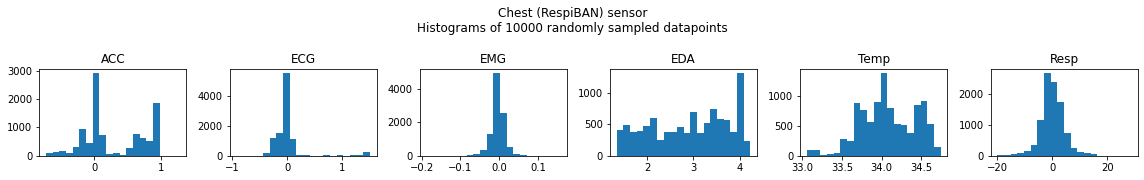


 Wrist (Empatica E4) sensor
ACC array has shape: (168064, 3) at 32 Hz for a total of  5252.0 seconds
BVP array has shape: (336128, 1) at 64 Hz for a total of  5252.0 seconds
EDA array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds
TEMP array has shape: (21008, 1) at 4 Hz for a total of  5252.0 seconds


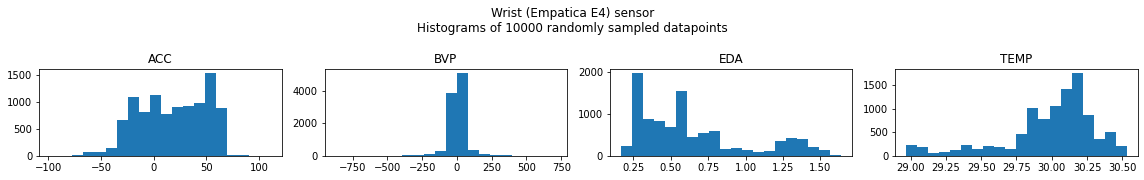


----------------------------------------------------------------------------

Elapsed time: 14.589622020721436


In [742]:
t0 = time()
S_signal = check_pkl_raw('S15', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [743]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 8.531927108764648


In [744]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3676400,)
ECG_x.shape (3676400,)
rpeaks.shape (6947,)
rpeaks_t.shape (6947,)
IBI_y.shape (6946,)
IBI_x.shape (6946,)
263 segments


In [745]:
e_frac_list[185:195]

array([0.70760456, 0.71140684, 0.71520913, 0.71901141, 0.72281369,
       0.72661597, 0.73041825, 0.73422053, 0.73802281, 0.7418251 ])

In [746]:
# GUI to manually fix any mistakes made by the hamilton_segmenter 
seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (31,)
ECG truncated shape: (15376,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [747]:
brush_update_IBI.seg_num

261

In [748]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

6945 6945
6946 6946


In [749]:
print(rpeaks[:5]/700)
print(brush_update_IBI.IBI_x[:5])

[0.38285714 1.08       1.78857143 2.48       3.16285714]
[1.08000029 1.78857192 2.48000067 3.162858   3.84428676]


In [753]:
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S15_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S15_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [754]:
S15_IBI_df = pd.DataFrame(dict(S15_time=S15_IBI_x, S15_IBI=S15_IBI_y))
S15_IBI_df.head()

,S15_time,S15_IBI
0,1.080000,0.697143
1,1.788572,0.708572
2,2.480001,0.691429
3,3.162858,0.682857
4,3.844287,0.681429


In [755]:
S15_IBI_df.to_csv('S15_IBI_df.csv')

In [756]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI15_suspicious_mask_post_processed = determine_suspicious_IBIs(S_IBI_x*700)

Out of 6944 total IBIs, 16 are suspicious. 
0.23 percent are suspicious


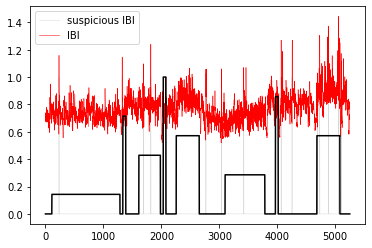

In [757]:
plt.plot(S_IBI_x[1:], IBI15_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S_IBI_x, S_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S15, moving to S16

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 3941700
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S16


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


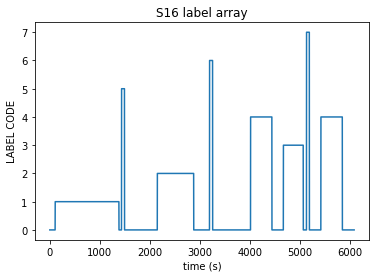



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (3941700, 3) at 700 Hz for a total of  5631.0 seconds
ECG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EMG array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
EDA array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Temp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds
Resp array has shape: (3941700, 1) at 700 Hz for a total of  5631.0 seconds


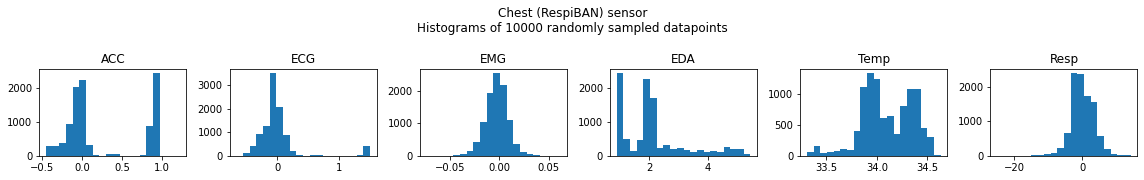


 Wrist (Empatica E4) sensor
ACC array has shape: (180192, 3) at 32 Hz for a total of  5631.0 seconds
BVP array has shape: (360384, 1) at 64 Hz for a total of  5631.0 seconds
EDA array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds
TEMP array has shape: (22524, 1) at 4 Hz for a total of  5631.0 seconds


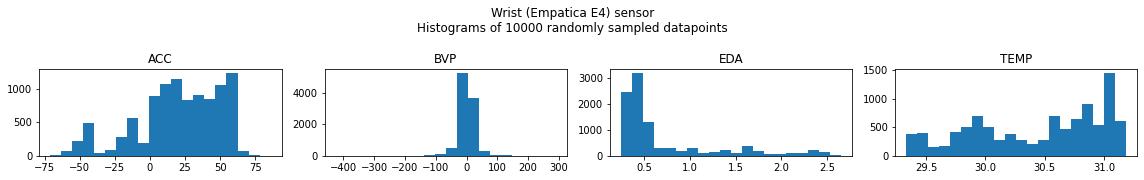


----------------------------------------------------------------------------

Elapsed time: 14.702994585037231


In [758]:
t0 = time()
S_signal = check_pkl_raw('S16', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [759]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 10.773297309875488


In [760]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (3941700,)
ECG_x.shape (3941700,)
rpeaks.shape (8044,)
rpeaks_t.shape (8044,)
IBI_y.shape (8043,)
IBI_x.shape (8043,)
282 segments


In [761]:
e_frac_list[185:195]

array([0.65992908, 0.66347518, 0.66702128, 0.67056738, 0.67411348,
       0.67765957, 0.68120567, 0.68475177, 0.68829787, 0.69184397])

In [762]:
# GUI to manually fix any mistakes made by the hamilton_segmenter 
seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (30,)
ECG truncated shape: (15375,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [763]:
brush_update_IBI.seg_num

280

In [764]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

8042 8042
8043 8043


In [765]:
print(rpeaks[:5]/700)
print(brush_update_IBI.IBI_x[:5])

[0.18428571 0.87142857 1.53285714 2.19142857 2.90285714]
[0.87142879 1.53285753 2.19142913 2.90285788 3.62142949]


In [766]:
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S16_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S16_IBI_y = np.copy(brush_update_IBI.IBI_y)
    S_IBI_x = S16_IBI_x
    S_IBI_y = S16_IBI_y

In [767]:
S16_IBI_df = pd.DataFrame(dict(S16_time=S_IBI_x, S16_IBI=S_IBI_y))
S16_IBI_df.head()

,S16_time,S16_IBI
0,0.871429,0.687143
1,1.532858,0.661429
2,2.191429,0.658572
3,2.902858,0.711429
4,3.621429,0.718572


In [768]:
S16_IBI_df.to_csv('S16_IBI_df.csv')

In [769]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI16_suspicious_mask_post_processed = determine_suspicious_IBIs(S_IBI_x*700)

Out of 8041 total IBIs, 5 are suspicious. 
0.06 percent are suspicious


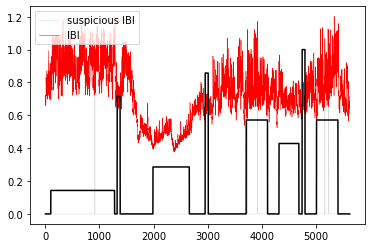

In [770]:
plt.plot(S_IBI_x[1:], IBI16_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S_IBI_x, S_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

# Done with S16, moving to S17

In [576]:
pkl_dict

{'S2': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S2\\S2.pkl',
 'S3': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S3\\S3.pkl',
 'S4': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S4\\S4.pkl',
 'S5': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S5\\S5.pkl',
 'S6': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S6\\S6.pkl',
 'S7': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S7\\S7.pkl',
 'S8': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S8\\S8.pkl',
 'S9': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S9\\S9.pkl',
 'S10': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S10\\S10.pkl',
 'S11': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S11\\S11.pkl',
 'S13': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S13\\S13.pkl',
 'S14': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone2\\data\\raw\\S14\\S14.pkl',
 'S15': 'D:\\Springboard\\Capstone2\\WESAD\\Capstone

Dictionary from .pkl file has keys: dict_keys(['signal', 'label', 'subject'])
signal  is type: <class 'dict'>  with length: 2
label  is type: <class 'numpy.ndarray'>  with length: 4144000
subject  is type: <class 'str'>  with length: 3


SUBJECT #: S17


LABEL unique values: [0 1 2 3 4 5 6 7]
{'0': 'not defined/transient', '1': 'baseline', '2': 'stress', '3': 'amusement', '4': 'meditation', '5': 'ignore', '6': 'ignore', '7': 'ignore'}


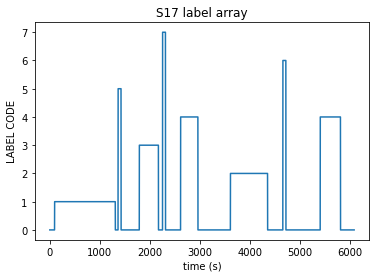



SIGNAL KEYS: dict_keys(['chest', 'wrist'])
chest: <class 'dict'> has keys: dict_keys(['ACC', 'ECG', 'EMG', 'EDA', 'Temp', 'Resp'])
wrist: <class 'dict'> has keys: dict_keys(['ACC', 'BVP', 'EDA', 'TEMP'])

 Chest (RespiBAN) sensor
ACC array has shape: (4144000, 3) at 700 Hz for a total of  5920.0 seconds
ECG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EMG array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
EDA array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Temp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds
Resp array has shape: (4144000, 1) at 700 Hz for a total of  5920.0 seconds


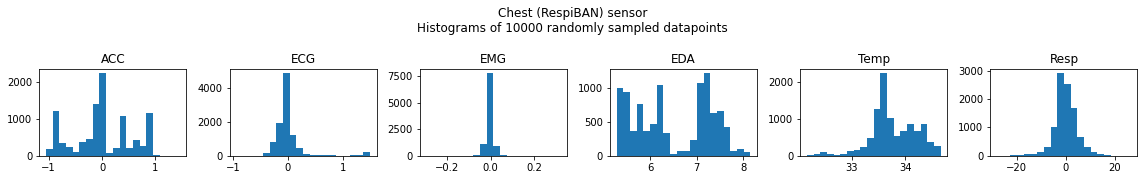


 Wrist (Empatica E4) sensor
ACC array has shape: (189440, 3) at 32 Hz for a total of  5920.0 seconds
BVP array has shape: (378880, 1) at 64 Hz for a total of  5920.0 seconds
EDA array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds
TEMP array has shape: (23680, 1) at 4 Hz for a total of  5920.0 seconds


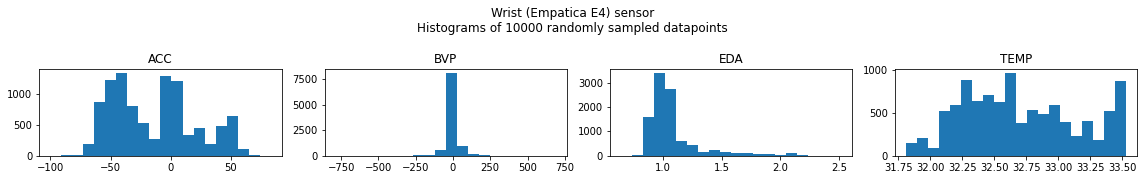


----------------------------------------------------------------------------

Elapsed time: 17.36275291442871


In [771]:
t0 = time()
S_signal = check_pkl_raw('S17', pkl_dict, return_data=True)
print('Elapsed time:',time() - t0)

In [772]:
t0 = time()
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
rpeaks = signals.ecg.hamilton_segmenter(ECG_y, sampling_rate=700)[0]
print('Elapsed time:',time() - t0)

Elapsed time: 11.002427339553833


In [773]:
ECG_y = S_signal['signal']['chest']['ECG'].flatten()
print("ECG_y.shape",ECG_y.shape)

ECG_x = np.linspace(0, len(ECG_y)/700, len(ECG_y))
print("ECG_x.shape",ECG_x.shape)

# rpeaks = signals.ecg.hamilton_segmenter(ECG_y, fs=700)[0] # ECG recording is 700 Hz # Want contents of ReturnTuple rather than 
print("rpeaks.shape",rpeaks.shape)

rpeaks_t = ECG_x[rpeaks]
print("rpeaks_t.shape",rpeaks_t.shape)

IBI_y = rpeaks_t[1:]-rpeaks_t[:-1]
print("IBI_y.shape",IBI_y.shape)

IBI_x = rpeaks_t[1:]
print("IBI_x.shape",IBI_x.shape)

# How many segments total?
num_segments = int(np.ceil(ECG_x[-1]/20))
print(num_segments,"segments")
#print(1/num_segments)
s_frac_list = np.linspace(0, 1, num_segments, endpoint=False)
e_frac_list = np.linspace(1/num_segments+(0.1/num_segments), 1+(0.1/num_segments), num_segments, endpoint=True)
#print(np.vstack([s_frac_list, e_frac_list]).T)

ECG_y.shape (4144000,)
ECG_x.shape (4144000,)
rpeaks.shape (7590,)
rpeaks_t.shape (7590,)
IBI_y.shape (7589,)
IBI_x.shape (7589,)
296 segments


In [774]:
e_frac_list[185:195]

array([0.62871622, 0.63209459, 0.63547297, 0.63885135, 0.64222973,
       0.64560811, 0.64898649, 0.65236486, 0.65574324, 0.65912162])

In [775]:
# GUI to manually fix any mistakes made by the hamilton_segmenter 
seg_num = 0

# Subset data to make plot size more manageable
s_frac = s_frac_list[seg_num] # Start of plot. 0 is start of recording. 1 is end of recording.
e_frac = e_frac_list[seg_num]  # End of plot.

# Determine indices of plot based on frac
s_idx = int(len(ECG_x)*s_frac)
try:
    e_idx = int(len(ECG_x)*e_frac)
except:
    e_idx = len(ECG_x)-1
    
IBI_mask = np.logical_and(rpeaks[1:] > s_idx, rpeaks[:-1] < e_idx)
print('IBI truncated shape:',IBI_x[IBI_mask].shape)
print('ECG truncated shape:',ECG_x[s_idx:e_idx].shape)

# Prepare plot with bqplot package.
x_linear = LinearScale()
y_linear = LinearScale()

# Plot Interbeat Interval data (derived from ECG)
IBI_lines = Lines(x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["Interbeat Intervals"], colors=["red"], display_legend=True,
                 marker="circle", stroke_width=0.5)

# Plot Raw ECG data
ECG_lines = Lines(x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx],
                 scales={'x':x_linear, 'y':y_linear},
                 labels=["ECG"], colors=["gray"], display_legend=True,
                  stroke_width=1)

ax_x = Axis(scale=x_linear, label="Time(s)")
ax_y = Axis(scale=y_linear, label="seconds or mV", orientation="vertical")

# Assemble figure.
fig = Figure(marks=[IBI_lines, ECG_lines],
      axes=[ax_x, ax_y],
      legend_location = "top-left",
      title="ECG and IBI",
      fig_margin = dict(top=50, bottom=50, left=50, right=20))

fig.layout.height="450px"
fig.layout.width="1000px"

#IBI_lines.tooltip = Tooltip(fields=['x', 'y'], labels=["Time:", "IBI:"], formats=["0.4f"]*2)
display(bqplot.toolbar.Toolbar(figure=fig))
display(fig)

action_toggle = ipywidgets.ToggleButtons(options=['Add new beat', 'Delete beat(s)'], description='Action:',
                                       tooltips=['Add beat at ECG max in interval',
                                                 'Delete beat(s) in interval'])
display(action_toggle)

def brush_update_IBI(*args):
    """Callback function for brush (BrushIntervalSelector)"""
    brushing = brush.brushing
    if not brushing:
        if brush.selected is not None:
              
            if action_toggle.value == 'Add new beat':
                ecg_low = np.argmin(abs(ECG_lines.x - brush.selected[0]))
                ecg_high = np.argmin(abs(ECG_lines.x - brush.selected[1]))
                new_peak_idx = np.argmax(ECG_lines.y[ecg_low:ecg_high])
                new_peak_time = ECG_lines.x[ecg_low:ecg_high][new_peak_idx]
                # Update entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(np.append(brush_update_IBI.IBI_x, new_peak_time))))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = np.sort(np.append( IBI_lines.x.flatten(), np.array(new_peak_time) ))
                    IBI_lines.y = np.append( IBI_lines.y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]).flatten() )
            
            elif action_toggle.value == 'Delete beat(s)':
                beats_to_delete_mask = np.logical_not( np.logical_and(IBI_lines.x > brush.selected[0], IBI_lines.x < brush.selected[1]) )
                #Remove from entire dataset
                brush_update_IBI.IBI_x = np.sort(list(set(brush_update_IBI.IBI_x)-set(IBI_lines.x[~beats_to_delete_mask])))
                brush_update_IBI.IBI_y = np.append(brush_update_IBI.IBI_y[0], brush_update_IBI.IBI_x[1:]-brush_update_IBI.IBI_x[:-1])
                # Refresh plot
                with IBI_lines.hold_sync():
                    IBI_lines.x = IBI_lines.x[beats_to_delete_mask]
                    IBI_lines.y = np.append(IBI_y[0], (IBI_lines.x[1:]-IBI_lines.x[:-1]))
            return brush_update_IBI.IBI_x, brush_update_IBI.IBI_y, brush_update_IBI.seg_num

# Selector to grab segments containing a missed ECG peak.
brush = bqplot.interacts.BrushIntervalSelector(marks=[ECG_lines], scale=ECG_lines.scales['x'])
fig.interaction = brush
brush.observe(brush_update_IBI, 'brushing') # Callback after brush interval selection

def Next_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num
    alt_seg_number += 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    try:
        e_idx = int(len(ECG_x)*e_frac)
    except:
        e_idx = len(ECG_x)-1
        with out:
            print('ERROR: End of array. Cannot scroll forward.')
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num

def Prev_Segment(b, out):
    # Refresh marks
    alt_seg_number = brush_update_IBI.seg_num #int(np.round(ECG_lines.x[0]/20))
    alt_seg_number -= 1
    with out:
        out.clear_output()
        print('Segment Number:',alt_seg_number)
    if alt_seg_number < 0:
        alt_seg_number = 0
        with out:
            print('ERROR: Start of array. Cannot scroll back.')
    #Select plot window
    s_frac = s_frac_list[alt_seg_number] # Start of plot. 0 is start of recording. 1 is end of recording.
    e_frac = e_frac_list[alt_seg_number]  # End of plot.
    s_idx = int(len(ECG_x)*s_frac)
    e_idx = int(len(ECG_x)*e_frac)       
    IBI_mask = np.logical_and(brush_update_IBI.IBI_x >= ECG_x[s_idx], brush_update_IBI.IBI_x <= ECG_x[e_idx])
    with ECG_lines.hold_sync(): # x=ECG_x[s_idx:e_idx], y=ECG_y[s_idx:e_idx]
        ECG_lines.x = ECG_x[s_idx:e_idx]
        ECG_lines.y = ECG_y[s_idx:e_idx]
    with IBI_lines.hold_sync(): # x=IBI_x[IBI_mask], y=IBI_y[IBI_mask], 
        IBI_lines.x = brush_update_IBI.IBI_x[IBI_mask]
        IBI_lines.y = brush_update_IBI.IBI_y[IBI_mask]
    brush_update_IBI.seg_num = alt_seg_number
    return brush_update_IBI.seg_num
    
brush_update_IBI.IBI_x = IBI_x
brush_update_IBI.IBI_y = IBI_y
brush_update_IBI.seg_num = seg_num
Next_button = ipywidgets.Button(description='Next')
display(Next_button)
field = ipywidgets.Output(layout={'border': '1px solid black'})
from functools import partial
Next_Seg = partial(Next_Segment, out=field)
Next_button.on_click(Next_Seg)
Prev_button = ipywidgets.Button(description='Prev')
display(Prev_button)
Prev_Seg = partial(Prev_Segment, out=field)
Prev_button.on_click(Prev_Seg)
display(field)
with field:
    print('Segment Number:', seg_num)

IBI truncated shape: (34,)
ECG truncated shape: (15400,)


Toolbar(figure=Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientatio…

Figure(axes=[Axis(label='Time(s)', scale=LinearScale()), Axis(label='seconds or mV', orientation='vertical', s…

ToggleButtons(description='Action:', options=('Add new beat', 'Delete beat(s)'), tooltips=('Add beat at ECG ma…

Button(description='Next', style=ButtonStyle())

Button(description='Prev', style=ButtonStyle())

Output(layout=Layout(border='1px solid black'))

In [776]:
brush_update_IBI.seg_num

294

In [777]:
print(len(brush_update_IBI.IBI_x), len(brush_update_IBI.IBI_y))
print(len(IBI_x), len(IBI_y))

7590 7590
7589 7589


In [779]:
print(rpeaks[1:6]/700)
print(brush_update_IBI.IBI_x[:5])

[0.67       1.35857143 2.01571429 2.67428571 3.33714286]
[0.67000016 1.35857176 2.01571477 2.67428636 3.33714366]


In [780]:
#if True: #
if len(brush_update_IBI.IBI_x) != len(IBI_x):
    S17_IBI_x = np.copy(brush_update_IBI.IBI_x)
    S17_IBI_y = np.copy(brush_update_IBI.IBI_y)

In [781]:
S_IBI_x = S17_IBI_x
S_IBI_y = S17_IBI_y
S17_IBI_df = pd.DataFrame(dict(S17_time=S_IBI_x, S17_IBI=S_IBI_y))
S17_IBI_df.head()

,S17_time,S17_IBI
0,0.670000,0.665714
1,1.358572,0.688572
2,2.015715,0.657143
3,2.674286,0.658572
4,3.337144,0.662857


In [782]:
S17_IBI_df.to_csv('S17_IBI_df.csv')

In [783]:
def determine_suspicious_IBIs(rpeaks):
    diff_indices = rpeaks[1:]-rpeaks[:-1]
    frac_change = diff_indices[1:]/diff_indices[:-1]
    suspicious_mask = np.logical_or(frac_change > 1.4, frac_change < 0.7)
    IBI_suspicious_mask = np.append(False, suspicious_mask)
    print('Out of {} total IBIs, {} are suspicious. \n{:.2f} percent are suspicious'.format(len(diff_indices), np.sum(suspicious_mask), np.mean(suspicious_mask)*100))
    return IBI_suspicious_mask

IBI17_suspicious_mask_post_processed = determine_suspicious_IBIs(S_IBI_x*700)

Out of 7589 total IBIs, 93 are suspicious. 
1.23 percent are suspicious


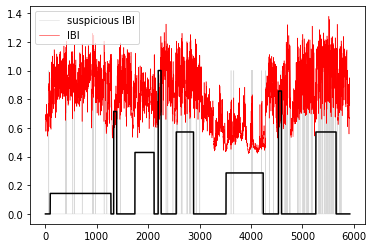

In [784]:
plt.plot(S_IBI_x[1:], IBI17_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
plt.plot(S_IBI_x, S_IBI_y, color='r', lw=0.5, label='IBI')
plt.plot(ECG_x, S_signal['label']/7, color='k')
plt.legend(loc='upper left')

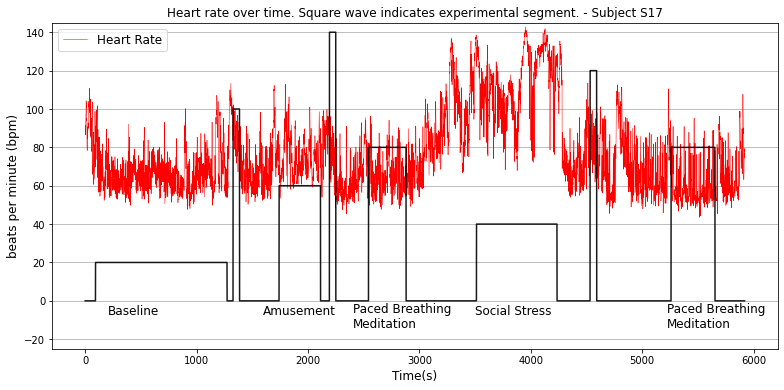

In [842]:
#plt.plot(S_IBI_x[1:], IBI17_suspicious_mask_post_processed, alpha=0.3, lw=0.5, color='gray', label='suspicious IBI')
HRfig = plt.figure(figsize=[13,6])
plt.plot(S_IBI_x, 60/S_IBI_y, color='r', lw=0.5, label='Heart Rate')
plt.plot(ECG_x, S_signal['label']*20, color='k',alpha=0.9)
plt.title('Heart rate over time. Square wave indicates experimental segment. - Subject S17', fontsize='large')
plt.ylabel('beats per minute (bpm)', fontsize='large')
plt.xlabel('Time(s)', fontsize='large')
plt.grid('major', axis='y')
plt.legend(loc='upper left', fontsize='large')
plt.ylim(-25, 145)
plt.annotate('Social Stress', xy=(3500, -7), fontsize='large')
plt.annotate('Paced Breathing\nMeditation', xy=(2400,-14), fontsize='large')
plt.annotate('Paced Breathing\nMeditation', xy=(5220, -14), fontsize='large')
plt.annotate('Baseline', xy=(200, -7), fontsize='large')
plt.annotate('Amusement', xy=(1600, -7), fontsize='large')
plt.show()